In [38]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

In [18]:
df = pd.read_csv('../../data/winequality.csv')


In [12]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [16]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Text(0.5, 1.0, 'Matrice de correlation')

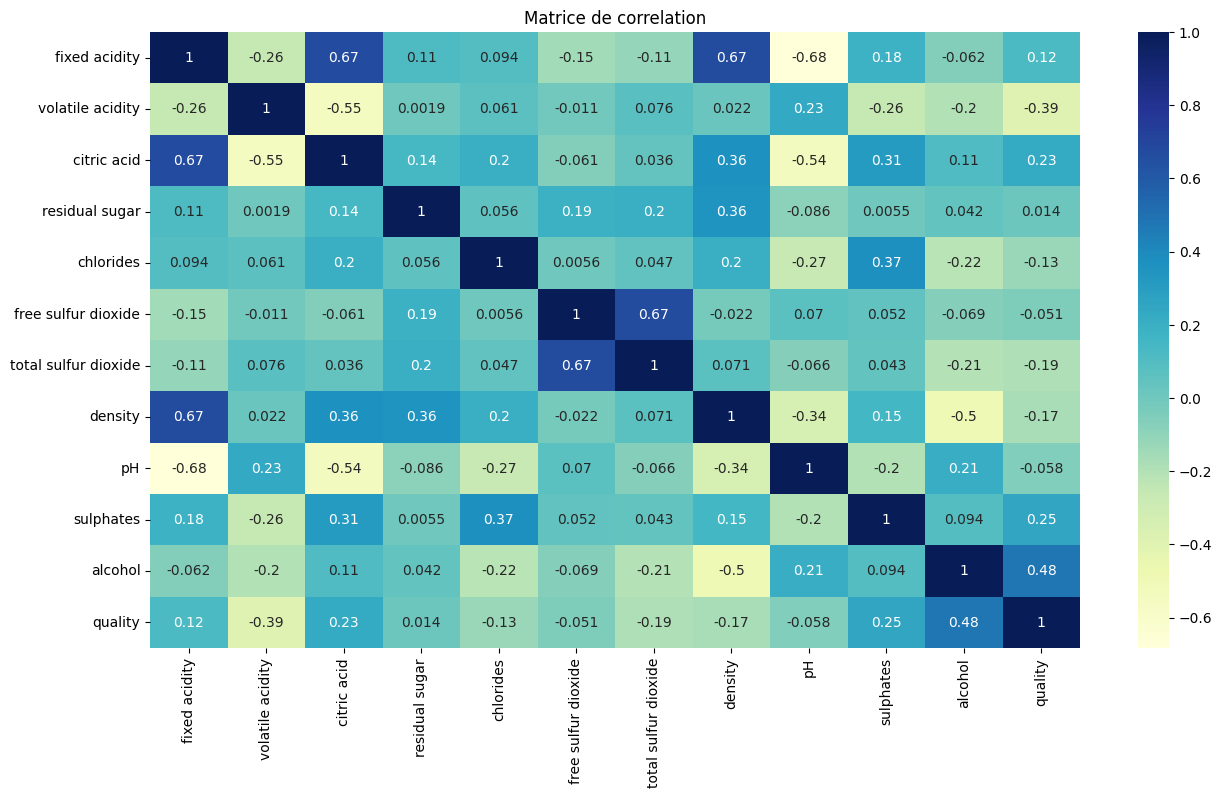

In [32]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.title('Matrice de correlation')

In [48]:
# Séparation features / target
X = df.drop('quality', axis=1)
y = df['quality']


# Train / Test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 


# Modèle 
model = LinearRegression()
model.fit(X_train_scaled, y_train)


# Prédiction 
y_pred = model.predict(X_test_scaled)


In [43]:
# R²
r2 = r2_score(y_test, y_pred)
print(f"R² : {r2:.3f}")

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE : {rmse:.3f}")


R² : 0.403
RMSE : 0.625


In [40]:
# Afficher les coefficients avec les noms des variables
coefficients = pd.DataFrame({
    "Variable": X.columns,
    "Coefficient": model.coef_
})
print(coefficients)


                Variable  Coefficient
0          fixed acidity     0.039789
1       volatile acidity    -0.179439
2            citric acid    -0.027512
3         residual sugar     0.009421
4              chlorides    -0.089084
5    free sulfur dioxide     0.058015
6   total sulfur dioxide    -0.120008
7                density    -0.019204
8                     pH    -0.060610
9              sulphates     0.146815
10               alcohol     0.296628


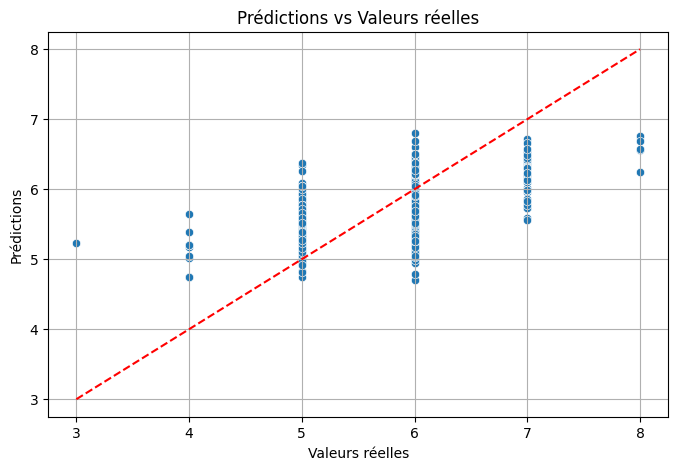

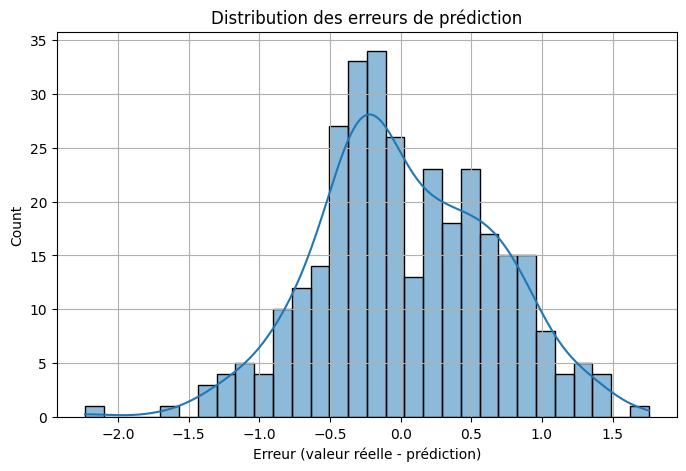

In [37]:
# Nuage de points : prédictions vs valeurs réelles
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("Prédictions vs Valeurs réelles")
plt.grid(True)
plt.show()

# Histogramme des erreurs
erreurs = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(erreurs, bins=30, kde=True)
plt.title("Distribution des erreurs de prédiction")
plt.xlabel("Erreur (valeur réelle - prédiction)")
plt.grid(True)
plt.show()

/var/folders/01/3jwc30js5pndkq3k6gmjmhg80000gn/T/ipykernel_41384/3696857829.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df, x="Coefficient", y="Variable", palette="coolwarm")


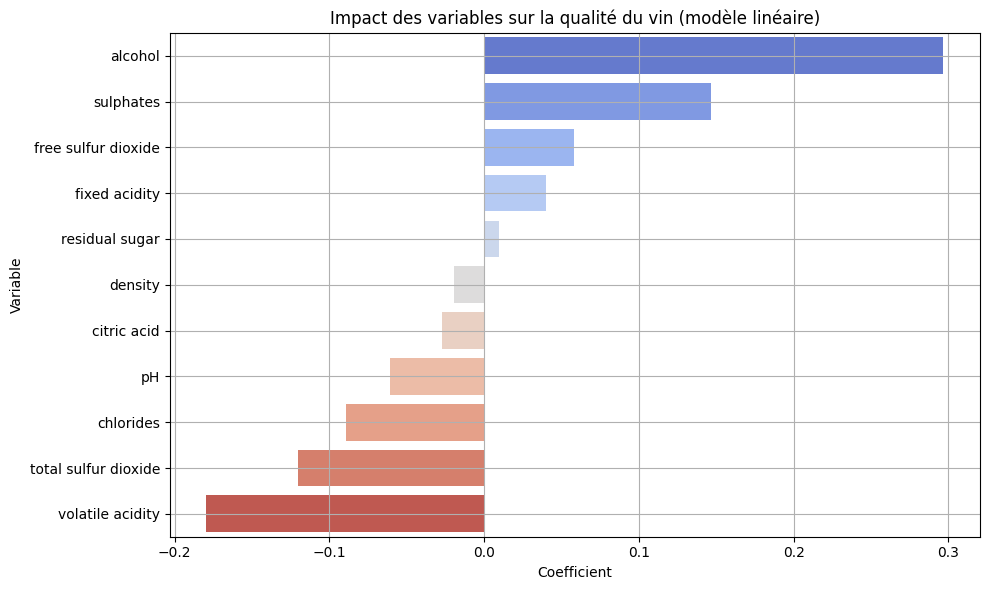

In [45]:
# Créer un DataFrame des coefficients
coef_df = pd.DataFrame({
    "Variable": features,
    "Coefficient": coeffs
}).sort_values(by="Coefficient", ascending=False)

# Afficher le graphique
plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df, x="Coefficient", y="Variable", palette="coolwarm")
plt.title("Impact des variables sur la qualité du vin (modèle linéaire)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [62]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)

r2_ridge = r2_score(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

print(f"R² Ridge : {r2_ridge:.3f}")
print(f"RMSE Ridge : {rmse_ridge:.3f}")


R² Ridge : 0.403
RMSE Ridge : 0.625


In [72]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=2)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

r2_lasso = r2_score(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

print(f"R² Lasso : {r2_lasso:.3f}")
print(f"RMSE Lasso : {rmse_lasso:.3f}")

R² Lasso : -0.006
RMSE Lasso : 0.811


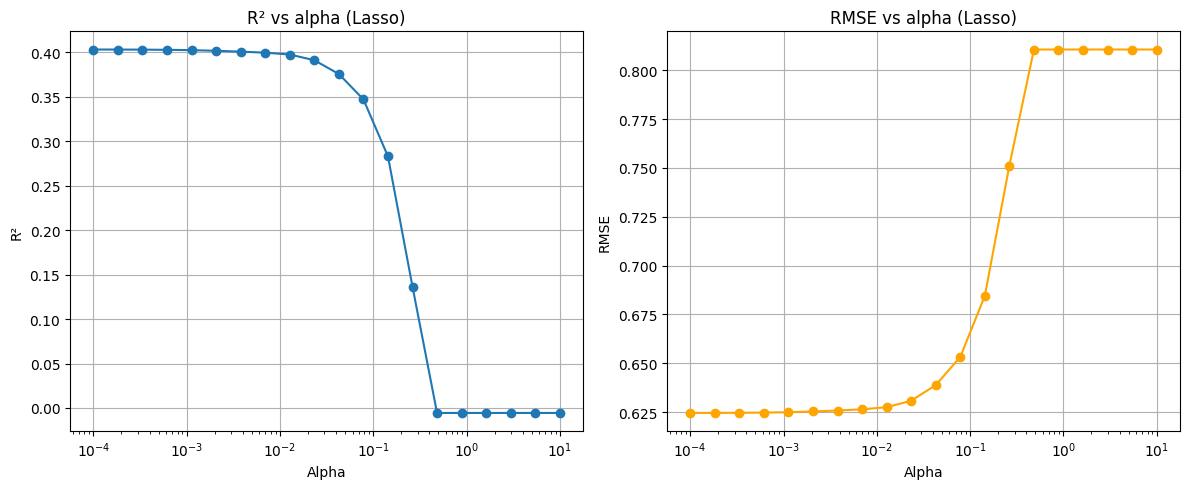

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error

alphas = np.logspace(-4, 1, 20)  # de 0.0001 à 10
r2_scores = []
rmse_scores = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train_scaled, y_train)
    y_pred = lasso.predict(X_test_scaled)

    r2_scores.append(r2_score(y_test, y_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))

# Tracer les scores
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(alphas, r2_scores, marker='o')
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("R²")
plt.title("R² vs alpha (Lasso)")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(alphas, rmse_scores, marker='o', color='orange')
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("RMSE")
plt.title("RMSE vs alpha (Lasso)")
plt.grid(True)

plt.tight_layout()
plt.show()


In [74]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"R² Random Forest : {r2_rf:.3f}")
print(f"RMSE Random Forest : {rmse_rf:.3f}")

R² Random Forest : 0.539
RMSE Random Forest : 0.549


In [75]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

r2_gb = r2_score(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))

print(f"R² Gradient Boosting : {r2_gb:.3f}")
print(f"RMSE Gradient Boosting : {rmse_gb:.3f}")


R² Gradient Boosting : 0.446
RMSE Gradient Boosting : 0.602


In [82]:
from sklearn.model_selection import GridSearchCV

# Grille des hyperparamètres à tester
param_grid_rf = {
    'n_estimators': [100, 300],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 5],
    'max_features': ['sqrt', 'log2']
}

# Création du modèle
rf = RandomForestRegressor(random_state=42)

# Recherche par validation croisée
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='r2', n_jobs=-1)
grid_rf.fit(X_train, y_train)

# Meilleurs paramètres
print("🔍 Meilleurs paramètres (Random Forest) :", grid_rf.best_params_)
print(f"✅ Score R² validation croisée : {grid_rf.best_score_:.3f}")

# Évaluation finale sur le test set
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
print(f"🎯 Score R² (test) : {r2_score(y_test, y_pred_rf):.3f}")
print(f"📏 RMSE (test) : {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.3f}")

🔍 Meilleurs paramètres (Random Forest) : {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 300}
✅ Score R² validation croisée : 0.441
🎯 Score R² (test) : 0.552
📏 RMSE (test) : 0.541
